In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#plus importing scipy.stats
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
#generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("normal on normal", scipy.stats.kstest(dist_n,'norm'))
print ("normal on normal", scipy.stats.anderson(dist_n, dist='norm'))
print ("")

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



# KS: high p-value pvalue>0.05: H0 that sample comes from a Gaussian distribution CANNOT be rejected
# AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 CANNOT be rejected.

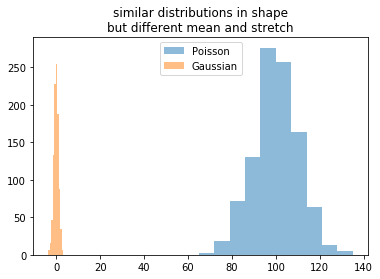

Figure 1: Poisson and normal distributions

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547550585, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussianbut I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


In [3]:
np.random.seed(999)
# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print ("Figure 1: Poisson and normal distributions\n")
print ("poisson on normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian" + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1")

# Conclusion:
# KS: The pvalue = 0.0 < 0.05 . I can reject $H_0$ than the two distributions are the same.
# We can see that although the shape is the same the $\mu$ and $\sigma$ are very different, so NO, they are not the same and makes sense to reject the Null.
# AD: the statistic = 0.72 is smaller than the 0.784 critical value for $\alpha$=0.05: the H0 _(that the poisson follows a normal cannot be rejected.
# We can see that the Poisson distribution with a $\mu$ and $\lambda$ = 100 does look like a normal distribution (phased off)

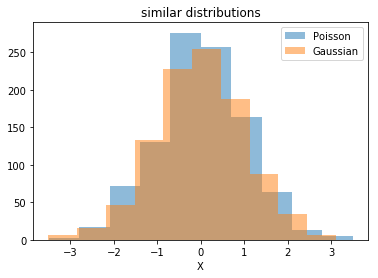

Figure 2: Poisson and normal distributions with same mu and lambda = 0

poisson vs normal KstestResult(statistic=0.047740290560897014, pvalue=0.02027702397150466)
poisson vs normal AndersonResult(statistic=0.72428815547573322, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: lower p-value but still rejecting the H0 at alpha=0.05
AD: statistics AD=0.92 larger than threshold (for alpha=0.05) 
thresh_0.05 = 0.784 ,  0.784


In [4]:
np.random.seed(999)
dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev


# **** IMPORTANT **** 
#         when we substract the mean and divide by the std deviation is how we center it !!!!!!!!! 
#
# **************************************************************************************************


pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.xlabel("X")
pl.show()

print ("Figure 2: Poisson and normal distributions with same mu and lambda = 0\n")

print ("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("KS: lower p-value but still rejecting the H0 at alpha=0.05") 
print ("AD: statistics AD=0.92 larger than threshold (for alpha=0.05) ") 

threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 = 0.784 , ", threshold[0])

# Conclusion:
# KS: The pvalue = 0.02 < 0.05 . I CAN reject $H_0$ than the two distributions are the same.
# AD: the statistic = 0.72 is smaller than the 0.784 critical value for $\alpha$=0.05: the H0 _(that the poisson follows a normal CANNOT be rejected.
# NOTE: Given that with the KS and the AD I cannot reach consensus as to accept or reject the Null I tested modifying the seed, the results, naturally change, sometimes they align, sometimes they don't. I would conclude the small(er) values of mean and lambda are behind and when we increase them there will be no room for deviations.
# Binomial distribution with n = 10, p=0.5,  $\mu$ = np = 5, $\sigma$ = sqrt(np(1 - p))

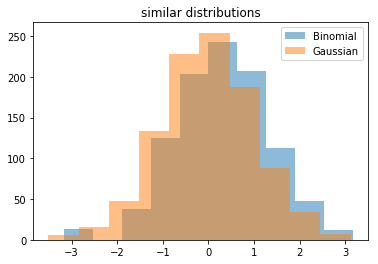

Figure 3: Binomial and normal distributions with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))

binomial vs normal KstestResult(statistic=0.121, pvalue=3.2351898937577062e-13)
binomial vs normal AndersonResult(statistic=15.784481340517914, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
 what does the result of each test say??


In [5]:
#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
np.random.seed(999)
n, p = 10, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))  #subtract mean divide by stdev
# remember I am doing the above (subtract mean and divide by std dev) so I can have them centered
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("Figure 3: Binomial and normal distributions with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))\n")


print ("binomial vs normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial vs normal", scipy.stats.anderson(dist_b, dist='norm'))
print (" what does the result of each test say??")

# Conclusion:
# KS: The pvalue is much lower than 0.05. I CAN reject $H_0$ than the two distributions are the same.
# AD: the statistic = 15.78 is way larger than the 0.784 critical value for $\alpha$=0.05: the H0 CAN be rejected

In [6]:
#np.histogram?

In [7]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#notice the extra comma on the left side of the '=' sign: 
#that tells numpy take the first two values returned, 
#and throw away the rest

#print (distpdf_n)
#print (mybins_n)

In [8]:
#scipy.stats.entropy?

In [9]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])


print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_b)))

#you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00527211066212
poisson on normal 0.00698654857671
binomial on normal 0.0756821572468


# Conclusion for KL:
# KL Divergence is a measure of how much does one distribution diverges from another distribution. The closer to 0 it meas they do not diverge and they have the same behaviour, the closer to 1 means they have completely different behavior
# The Gaussian vs the Gaussian has a relatively small value, and this is in accordance to as closer to zero it means the two distributions have the same behaviour.
# The Poisson vs the normal, oddly enough has also a small value.
# The Binomial vs the normal is the one that has the highest divergence value, which means that from the 3 comparisons it is the one that is further away from the normal distribution.

In [10]:
np.random.seed(999)

narray = np.arange(1,351)

ks_s_b = np.zeros(len(narray))
ks_p_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))

cs_s_b = np.zeros(len(narray))
cs_p_b = np.zeros(len(narray))

#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution:  (remember I am subtracting mean and dividing by std dev so I can center)
    
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]

    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    #print (mybins)  I still dont know what this is
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    
    
    kl_b[i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0]/1000., 
                                   scipy.stats.norm.pdf(bincenters))

    
    # ChisQ
    
    cs_s_b[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0]/1000., 
                                   scipy.stats.norm.pdf(bincenters))[0]
    
    cs_p_b[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0]/1000., 
                                   scipy.stats.norm.pdf(bincenters))[1]
    
print (n)

350


In [11]:
#scipy.stats.entropy?

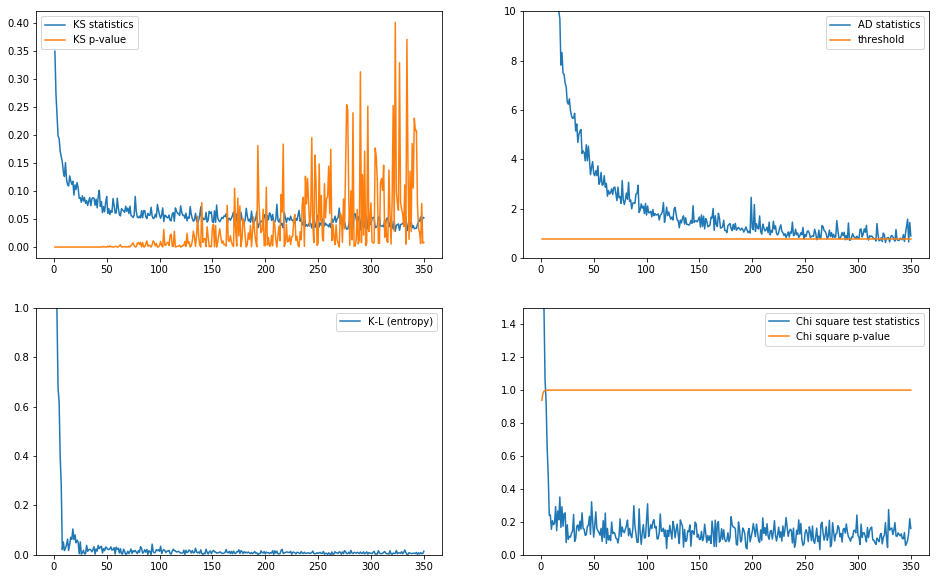

Figure 4: Test for comparison between Binomial distribution with increased np vs a Gaussian



In [12]:
fig = pl.figure(figsize = (16, 10))
fig.add_subplot(221)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L (entropy)')
pl.ylim(0,1)
pl.legend();

fig.add_subplot(224)
pl.plot(narray, cs_s_b, label='Chi square test statistics')
pl.plot(narray, cs_p_b, label='Chi square p-value')
pl.ylim(0,1.5)
pl.legend()


pl.show()
print ("Figure 4: Test for comparison between Binomial distribution with increased np vs a Gaussian\n")

In [13]:
np.random.seed(999)

narray = np.arange(1,351)

ks_s_p = np.zeros(len(narray))
ks_p_p = np.zeros(len(narray))
ad_p = np.zeros(len(narray))
kl_p = np.zeros(len(narray))

cs_s_p = np.zeros(len(narray))
cs_p_p = np.zeros(len(narray))

#dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev

#loop over the different values of n
for i,n in enumerate(narray):
    #generate the distribution
    dist_p = (np.random.poisson(n, 1000) - n) * (1/np.sqrt(n)) 
    #remember I am subtracting mean and dividing by std dev so I can center
    #run the tests. 
    ks_s_p[i] = scipy.stats.kstest(dist_p,'norm')[0]
    ks_p_p[i] = scipy.stats.kstest(dist_p,'norm')[1]
    #print (scipy.pythonstats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_p[i] = scipy.stats.anderson(dist_p, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist_p), max(dist_p), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    
    
    kl_p[i] =  scipy.stats.entropy(np.histogram(dist_p, bins=mybins)[0], 
                                   scipy.stats.norm.pdf(bincenters) + n)
  

    #Chi square... I think
    cs_s_p[i] = scipy.stats.chisquare(np.histogram(dist_p, bins=mybins)[0]/1000., 
                                   scipy.stats.norm.pdf(bincenters))[0]
    
    cs_p_p[i] = scipy.stats.chisquare(np.histogram(dist_p, bins=mybins)[0]/1000., 
                                   scipy.stats.norm.pdf(bincenters))[1]

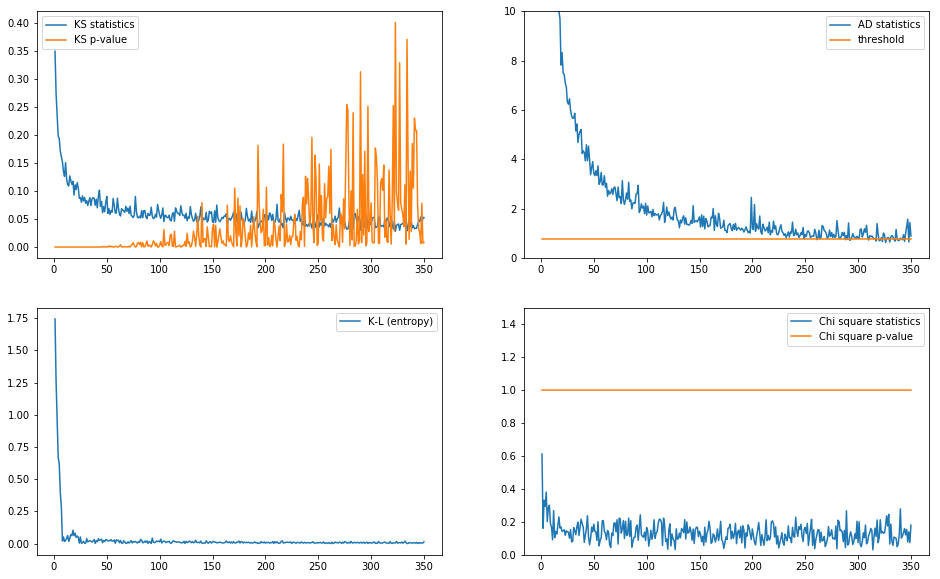

Figure 5: Test for comparison between Poisson distribution with increased lambda vs a Gaussian



In [14]:
fig = pl.figure(figsize = (16,10))
fig.add_subplot(221)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L (entropy)')
pl.legend();


fig.add_subplot(224)
pl.plot(narray, cs_s_p, label='Chi square statistics')
pl.plot(narray, cs_p_p, label='Chi square p-value')
pl.ylim(0,1.5)
pl.legend()


pl.show()
print ("Figure 5: Test for comparison between Poisson distribution with increased lambda vs a Gaussian\n")

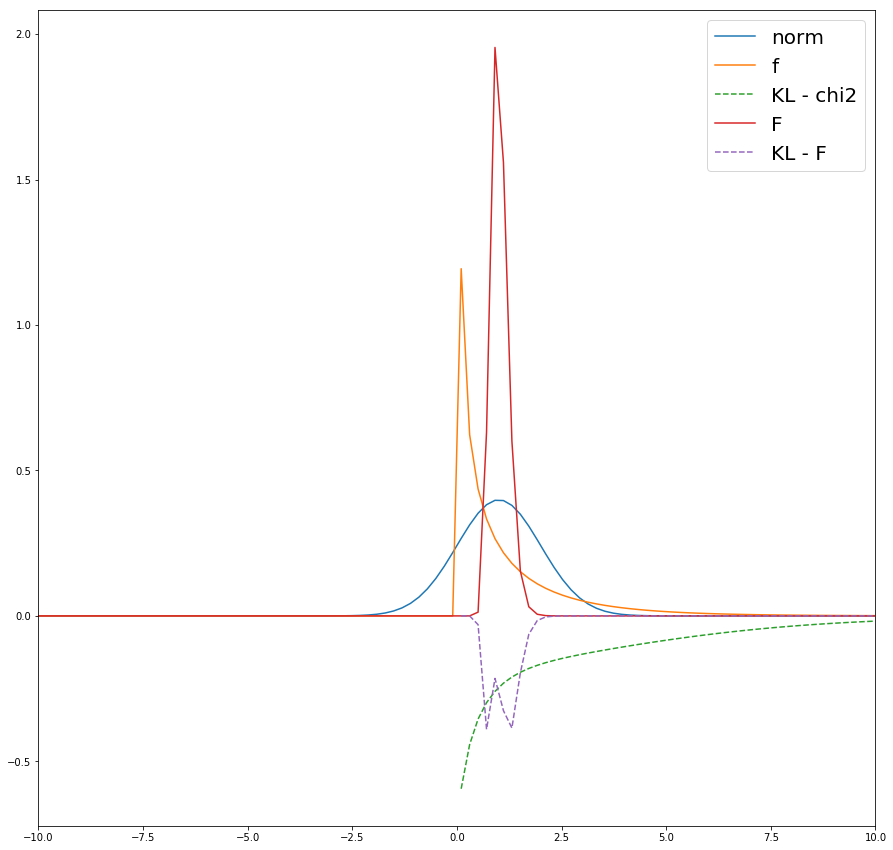

In [15]:
pl.figure(figsize=(15,15))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);